# Optimization in Data Science Part 1

Referenced Textbook: https://cobweb.cs.uga.edu/~jam/scalation_guide/comp_data_science.pdf

Specifically Appendix A (Starting Page 619)

## Gradient Decent

*** Reminder: Brush up on you Calculus especially derivatives and the chain rule ***

### What is it?

Gradient Descent is an algorithm that solves optimization problems using first-order iterations. Since it is designed to find the local minimum of a differential function, gradient descent is widely used in machine learning models to find the best parameters that minimize the model’s cost function. 

![](../pics/grad_dec/gd.png)

### Why do we need it? 

Data science uses optimization to fit parameters in models, where for example a quality of fit measure (e.g.,sum of squared errors) is minimized. Typically, gradients are involved. In some cases, the gradient of the measure can be set to zero allowing the optimal parameters to be determined by matrix factorization. For complex models, this may not work, so an optimization algorithm that moves in the direction opposite to the gradient can be applied.

In addition as the number of variables or features in our problem increases, it becomes more computationally expensive to use matrix factorization or other pure linear alegebra techniques. So we can use the gradient descent algoritm to save time in computation. Also, gradient descent allows for parrallization and distributed calculations across processors. 


### How does it work?

![](../pics/grad_dec/gd_work.png)

There is a great in depth tutorial with Josh Starmer from StatQuest if you need more explanation:
https://www.youtube.com/watch?v=sDv4f4s2SB8

Steps:

1. Initialize the inputs (weights) randomly and select a learning rate
1. Calculate the gradient 
1. Adjust the inputs (weights) with the gradients
1. Use new inputs (weights) to repeats steps 2 and 3 until some condition (ie. inputs (weights) no longer significantly reduce error, max iterations, etc.)

### Note

There are 2 flavors or ways to approach gradient decent.

1. Pure Gradient Desent - You can update your inputs (weights) for each data instance
2. Batch Gradient Desent - You can update your inputs (weights) for after going through the full training set with an average

In our case, we will just be showing pure gradient descent and updating for every instance

### Coding Example

![](../pics/grad_dec/cost_fnt.png)

Visual repersentation of the cost or objective function:

![](../pics/grad_dec/cfg.jpg)

#### 1. INITIALIZE INPUTS (WEIGHTS)

In [65]:
# Start by initializing our inputs (weights)

import numpy as np

X = [np.random.random() * 10, np.random.random() * 10]
X

[3.244889029274235, 1.105548491534124]

#### 2. CALCULATE GRADIENT 

Formula for Gradient in 2 Dimensions:

![](../pics/grad_dec/grad.jpg)

In [66]:
# Calculating our gradient!
# We can do this manually or with the python package sympy
# Link to sympy documentation: https://docs.sympy.org/latest/index.html

import sympy as sp

# Define our initatial cost function or more generally our function to minimize
# In this case we will let x1 = x and x2 = y

x = sp.Symbol('x')
y = sp.Symbol('y')

fox = (x - 4) ** 2 + (y - 2) ** 2

dx_fox = sp.diff(fox, x)

dy_fox = sp.diff(fox, y)

grad_vec = [dx_fox, dy_fox]

grad_vec


[2*x - 8, 2*y - 4]

In [67]:
# Make a function to return the value from the gradiant for a given input

def getGrad (grad_vec, var, input):
    
    if (var == 0):
        grad = grad_vec[var].evalf(subs={x:input})
    else:
        grad = grad_vec[var].evalf(subs={y:input})
    
    return grad

#### 3. UPDATE INPUTS (WEIGHTS) 

Equation showing how we should update our inputs (weights)

![](../pics/grad_dec/gd_uf.jpg)

In [68]:
# Make a gradient decent function from the above equation!
# eta is our learning rate in this case and we will set it to .01

def gradientDecent (X, eta):
    X[0] = X[0] - eta * getGrad(grad_vec, 0, X[0])
    X[1] = X[1] - eta * getGrad(grad_vec, 1, X[1])
    return X
    

In [69]:
# Now lets put it in a loop to see how it behave over many iterations

max_iter = 100

X1_list = []
X2_list = []

for i in range (0, max_iter):
    
    X = gradientDecent (X , .1)
    print(X)
    X1_list.append(X[0])
    X2_list.append(X[1])

[3.24639925121569, 1.10733739455106]
[3.24790645271326, 1.10912271976195]
[3.24941063980783, 1.11090447432243]
[3.25091181852821, 1.11268266537379]
[3.25240999489116, 1.11445730004304]
[3.25390517490137, 1.11622838544295]
[3.25539736455157, 1.11799592867207]
[3.25688656982247, 1.11975993681472]
[3.25837279668282, 1.12152041694109]
[3.25985605108946, 1.12327737610721]
[3.26133633898728, 1.12503082135500]
[3.26281366630930, 1.12678075971229]
[3.26428803897669, 1.12852719819286]
[3.26575946289873, 1.13027014379648]
[3.26722794397294, 1.13200960350888]
[3.26869348808499, 1.13374558430186]
[3.27015610110882, 1.13547809313326]
[3.27161578890660, 1.13720713694699]
[3.27307255732879, 1.13893272267310]
[3.27452641221413, 1.14065485722775]
[3.27597735938970, 1.14237354751330]
[3.27742540467092, 1.14408880041827]
[3.27887055386158, 1.14580062281743]
[3.28031281275386, 1.14750902157180]
[3.28175218712835, 1.14921400352866]
[3.28318868275409, 1.15091557552160]
[3.28462230538859, 1.15261374437056]
[

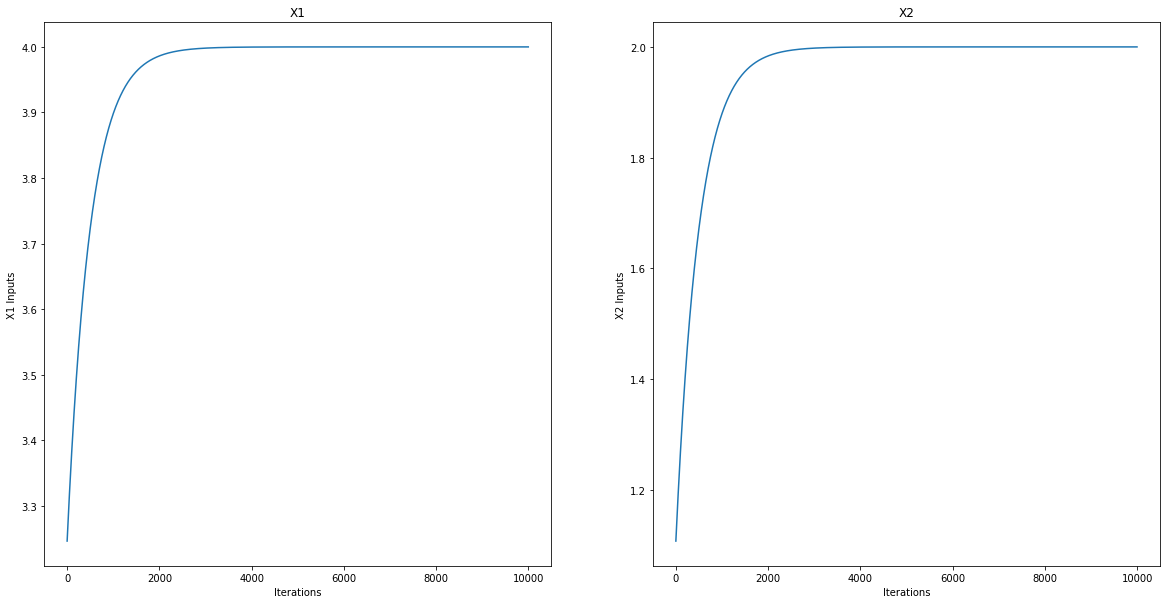

In [70]:
# plot our findings

import matplotlib.pyplot as plt

# Make a list of 0 to 1000 so we can plot our iterations

iters = range(0, max_iter)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(iters, X1_list)
plt.title('X1')
plt.xlabel('Iterations')
plt.ylabel('X1 Inputs')

plt.subplot(1, 2, 2)
plt.plot(iters, X2_list)
plt.title("X2")
plt.xlabel('Iterations')
plt.ylabel('X2 Inputs')


plt.show()